In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.preprocessing import StandardScaler

In [3]:
# CSVファイルの読み込み
df1 = pd.read_csv('xy(1).csv')
df2 = pd.read_csv('xy(2).csv')
df3 = pd.read_csv('xy(3).csv')

# データの抽出
x_data = df1['x']
y_data_1 = df1['y']
y_data_2 = df2['y']
y_data_3 = df3['y']

# モデル関数の定義
def model(x, Kxx, Kyy, Kxy):
    C = np.cos(np.radians(x))
    S = np.sin(np.radians(x))
    k1 = C*(C*Kxx + S*Kxy) + S*(C*Kxy + S*Kyy)
    k2 = C*(-0.5*Kxx*(-0.5*C - 0.866025403784439*S) - 0.5*Kxy*(-0.866025403784439*C - 0.5*S) - 0.866025403784439*Kxy*(-0.5*C - 0.866025403784439*S) - 0.866025403784439*Kyy*(-0.866025403784439*C - 0.5*S)) + S*(-0.866025403784439*Kxx*(-0.5*C - 0.866025403784439*S) - 0.866025403784439*Kxy*(-0.866025403784439*C - 0.5*S) - 0.5*Kxy*(-0.5*C - 0.866025403784439*S) - 0.5*Kyy*(-0.866025403784439*C - 0.5*S))
    k3 = C*(-0.5*Kxx*(-0.5*C + 0.866025403784439*S) + 0.866025403784439*Kxy*(-0.5*C + 0.866025403784439*S) - 0.5*Kxy*(0.866025403784439*C - 0.5*S) + 0.866025403784439*Kyy*(0.866025403784439*C - 0.5*S)) + S*(0.866025403784439*Kxx*(-0.5*C + 0.866025403784439*S) - 0.5*Kxy*(-0.5*C + 0.866025403784439*S) + 0.866025403784439*Kxy*(0.866025403784439*C - 0.5*S) - 0.5*Kyy*(0.866025403784439*C - 0.5*S))
    return k1, k2, k3

# 目的関数の定義
def objective(x, Kxx, Kyy, Kxy):
    k1, k2, k3 = model(x, Kxx, Kyy, Kxy)
    return np.concatenate([k1, k2, k3])

# # x_data を複製して、y_data の各行に対応するようにする
# x_data_repeated = np.tile(x_data, 3)

# # y_data を1次元配列に変換
# y_data_combined = np.concatenate([y_data_1, y_data_2, y_data_3])

# # フィッティング
# params, params_covariance = curve_fit(objective, x_data_repeated, y_data_combined, p0=[1, 1, 1])

# print("Fitted parameters: Kxx =", params[0], "Kyy =", params[1], "Kxy =", params[2])

# # 結果のプロット
# plt.figure(figsize=(10, 6))

# # データのプロット
# plt.plot(x_data, y_data_1, 'o', label='Data 1')
# plt.plot(x_data, y_data_2, 'x', label='Data 2')
# plt.plot(x_data, y_data_3, 's', label='Data 3')

# # フィッティング結果のプロット
# y_fit = model(x_data, *params)
# plt.plot(x_data, y_fit[0], '-', label='Fit k1')
# plt.plot(x_data, y_fit[1], '--', label='Fit k2')
# plt.plot(x_data, y_fit[2], ':', label='Fit k3')

# plt.xlabel('X Axis Label')
# plt.ylabel('Y Axis Label')
# plt.title('Fitting Results')
# plt.legend()
# plt.grid(True)

# plt.show()

In [4]:
# # CSVファイルの読み込み
# df1 = pd.read_csv('xy(1).csv')
# df2 = pd.read_csv('xy(2).csv')
# df3 = pd.read_csv('xy(3).csv')

# # データの抽出
# x_data_1 = df1['x'].values
# x_data_2 = df2['x'].values
# x_data_3 = df3['x'].values
# y_data_1 = df1['y'].values
# y_data_2 = df2['y'].values
# y_data_3 = df3['y'].values

# # 全 x データのユニークな値を取得
# x_all = np.unique(np.concatenate([x_data_1, x_data_2, x_data_3]))

# # 補間関数の作成
# interp_func_1 = interp1d(x_data_1, y_data_1, kind='linear', fill_value='extrapolate')
# interp_func_2 = interp1d(x_data_2, y_data_2, kind='linear', fill_value='extrapolate')
# interp_func_3 = interp1d(x_data_3, y_data_3, kind='linear', fill_value='extrapolate')

# # 全 x データに対する y データを補間
# y_data_interp_1 = interp_func_1(x_all)
# y_data_interp_2 = interp_func_2(x_all)
# y_data_interp_3 = interp_func_3(x_all)

# # 統一した x データと対応する y データを結合
# x_data_combined = np.concatenate([x_all, x_all, x_all])
# y_data_combined = np.concatenate([y_data_interp_1, y_data_interp_2, y_data_interp_3])

# # モデル関数の定義
# def model(x, Kxx, Kyy, Kxy):
#     C = np.cos(np.radians(x))
#     S = np.sin(np.radians(x))
#     k1 = C*(C*Kxx + S*Kxy) + S*(C*Kxy + S*Kyy)
#     k2 = C*(-0.5*Kxx*(-0.5*C - 0.866025403784439*S) - 0.5*Kxy*(-0.866025403784439*C - 0.5*S) - 0.866025403784439*Kxy*(-0.5*C - 0.866025403784439*S) - 0.866025403784439*Kyy*(-0.866025403784439*C - 0.5*S)) + S*(-0.866025403784439*Kxx*(-0.5*C - 0.866025403784439*S) - 0.866025403784439*Kxy*(-0.866025403784439*C - 0.5*S) - 0.5*Kxy*(-0.5*C - 0.866025403784439*S) - 0.5*Kyy*(-0.866025403784439*C - 0.5*S))
#     k3 = C*(-0.5*Kxx*(-0.5*C + 0.866025403784439*S) + 0.866025403784439*Kxy*(-0.5*C + 0.866025403784439*S) - 0.5*Kxy*(0.866025403784439*C - 0.5*S) + 0.866025403784439*Kyy*(0.866025403784439*C - 0.5*S)) + S*(0.866025403784439*Kxx*(-0.5*C + 0.866025403784439*S) - 0.5*Kxy*(-0.5*C + 0.866025403784439*S) + 0.866025403784439*Kxy*(0.866025403784439*C - 0.5*S) - 0.5*Kyy*(0.866025403784439*C - 0.5*S))
#     return k1, k2, k3

# # 目的関数の定義
# def objective(x, Kxx, Kyy, Kxy):
#     k1, k2, k3 = model(x, Kxx, Kyy, Kxy)
#     # 各 k 値を長さが一致するようにリシェイプ
#     return np.concatenate([k1, k2, k3])

# # フィッティング
# params, params_covariance = curve_fit(objective, x_data_combined, y_data_combined, p0=[1, 1, 1])

# print("Fitted parameters: Kxx =", params[0], "Kyy =", params[1], "Kxy =", params[2])

# # 結果のプロット
# plt.figure(figsize=(10, 6))

# # 補間されたデータのプロット
# plt.plot(x_all, y_data_interp_1, 'o', label='Data 1')
# plt.plot(x_all, y_data_interp_2, 'x', label='Data 2')
# plt.plot(x_all, y_data_interp_3, 's', label='Data 3')

# # フィッティング結果のプロット
# y_fit_k1, y_fit_k2, y_fit_k3 = model(x_all, *params)
# plt.plot(x_all, y_fit_k1, '-', label='Fit k1')
# plt.plot(x_all, y_fit_k2, '--', label='Fit k2')
# plt.plot(x_all, y_fit_k3, ':', label='Fit k3')

# plt.xlabel('X Axis Label')
# plt.ylabel('Y Axis Label')
# plt.title('Fitting Results')
# plt.legend()
# plt.grid(True)

# plt.show()

In [5]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# CSVファイルの読み込み
df1 = pd.read_csv('xy(1).csv')
df2 = pd.read_csv('xy(2).csv')
df3 = pd.read_csv('xy(3).csv')

# データの抽出
x_data_1 = df1['x'].values
x_data_2 = df2['x'].values
x_data_3 = df3['x'].values
y_data_1 = df1['y'].values
y_data_2 = df2['y'].values
y_data_3 = df3['y'].values

# 全 x データのユニークな値を取得
x_all = np.unique(np.concatenate([x_data_1, x_data_2, x_data_3]))

# 補間関数の作成
interp_func_1 = interp1d(x_data_1, y_data_1, kind='linear', fill_value='extrapolate')
interp_func_2 = interp1d(x_data_2, y_data_2, kind='linear', fill_value='extrapolate')
interp_func_3 = interp1d(x_data_3, y_data_3, kind='linear', fill_value='extrapolate')

# 全 x データに対する y データを補間
y_data_interp_1 = interp_func_1(x_all)
y_data_interp_2 = interp_func_2(x_all)
y_data_interp_3 = interp_func_3(x_all)

# 統一した x データと対応する y データを結合
x_data_combined = np.concatenate([x_all, x_all, x_all])
y_data_combined = np.concatenate([y_data_interp_1, y_data_interp_2, y_data_interp_3])


In [6]:
# モデル関数の定義
def model(x, Kxx, Kyy, Kxy):
    C = np.cos(np.radians(x))
    S = np.sin(np.radians(x))
    k1 = C*(C*Kxx + S*Kxy) + S*(C*Kxy + S*Kyy)
    k2 = C*(-0.5*Kxx*(-0.5*C - 0.866025403784439*S) - 0.5*Kxy*(-0.866025403784439*C - 0.5*S) - 0.866025403784439*Kxy*(-0.5*C - 0.866025403784439*S) - 0.866025403784439*Kyy*(-0.866025403784439*C - 0.5*S)) + S*(-0.866025403784439*Kxx*(-0.5*C - 0.866025403784439*S) - 0.866025403784439*Kxy*(-0.866025403784439*C - 0.5*S) - 0.5*Kxy*(-0.5*C - 0.866025403784439*S) - 0.5*Kyy*(-0.866025403784439*C - 0.5*S))
    k3 = C*(-0.5*Kxx*(-0.5*C + 0.866025403784439*S) + 0.866025403784439*Kxy*(-0.5*C + 0.866025403784439*S) - 0.5*Kxy*(0.866025403784439*C - 0.5*S) + 0.866025403784439*Kyy*(0.866025403784439*C - 0.5*S)) + S*(0.866025403784439*Kxx*(-0.5*C + 0.866025403784439*S) - 0.5*Kxy*(-0.5*C + 0.866025403784439*S) + 0.866025403784439*Kxy*(0.866025403784439*C - 0.5*S) - 0.5*Kyy*(0.866025403784439*C - 0.5*S))
    return k1, k2, k3

# 目的関数の定義
def objective(x, Kxx, Kyy, Kxy):
    k1, k2, k3 = model(x, Kxx, Kyy, Kxy)
    return np.concatenate([k1, k2, k3])


In [7]:
# # フィッティング
# params, params_covariance = curve_fit(objective, x_data_combined, y_data_combined, p0=[1, 1, 1])

# print("Fitted parameters: Kxx =", params[0], "Kyy =", params[1], "Kxy =", params[2])

# # フィッティング結果のプロット
# plt.figure(figsize=(10, 6))

# # 補間されたデータのプロット
# plt.plot(x_all, y_data_interp_1, 'o', label='Data 1')
# plt.plot(x_all, y_data_interp_2, 'x', label='Data 2')
# plt.plot(x_all, y_data_interp_3, 's', label='Data 3')

# # フィッティング結果のプロット
# y_fit_k1, y_fit_k2, y_fit_k3 = model(x_all, *params)

# plt.plot(x_all, y_fit_k1, '-', label='Fit k1')
# plt.plot(x_all, y_fit_k2, '--', label='Fit k2')
# plt.plot(x_all, y_fit_k3, ':', label='Fit k3')

# plt.xlabel('X Axis Label')
# plt.ylabel('Y Axis Label')
# plt.title('Fitting Results')
# plt.legend()
# plt.grid(True)

# plt.show()

In [8]:
# import numpy as np
# import pandas as pd
# from scipy.optimize import curve_fit
# import matplotlib.pyplot as plt
# from scipy.interpolate import interp1d

# # CSVファイルの読み込み
# df1 = pd.read_csv('xy(1).csv')
# df2 = pd.read_csv('xy(2).csv')
# df3 = pd.read_csv('xy(3).csv')

# # データの抽出
# x_data_1 = df1['x'].values
# x_data_2 = df2['x'].values
# x_data_3 = df3['x'].values
# y_data_1 = df1['y'].values
# y_data_2 = df2['y'].values
# y_data_3 = df3['y'].values

# # 全 x データのユニークな値を取得
# x_all = np.unique(np.concatenate([x_data_1, x_data_2, x_data_3]))

# # 補間関数の作成
# interp_func_1 = interp1d(x_data_1, y_data_1, kind='linear', fill_value='extrapolate')
# interp_func_2 = interp1d(x_data_2, y_data_2, kind='linear', fill_value='extrapolate')
# interp_func_3 = interp1d(x_data_3, y_data_3, kind='linear', fill_value='extrapolate')

# # 全 x データに対する y データを補間
# y_data_interp_1 = interp_func_1(x_all)
# y_data_interp_2 = interp_func_2(x_all)
# y_data_interp_3 = interp_func_3(x_all)

# # 統一した x データと対応する y データを結合
# x_data_combined = np.concatenate([x_all, x_all, x_all])
# y_data_combined = np.concatenate([y_data_interp_1, y_data_interp_2, y_data_interp_3])

# # モデル関数の定義
# def model(x, Kxx, Kyy, Kxy):
#     C = np.cos(np.radians(x))
#     S = np.sin(np.radians(x))
#     k1 = C*(C*Kxx + S*Kxy) + S*(C*Kxy + S*Kyy)
#     k2 = C*(-0.5*Kxx*(-0.5*C - 0.866025403784439*S) - 0.5*Kxy*(-0.866025403784439*C - 0.5*S) - 0.866025403784439*Kxy*(-0.5*C - 0.866025403784439*S) - 0.866025403784439*Kyy*(-0.866025403784439*C - 0.5*S)) + S*(-0.866025403784439*Kxx*(-0.5*C - 0.866025403784439*S) - 0.866025403784439*Kxy*(-0.866025403784439*C - 0.5*S) - 0.5*Kxy*(-0.5*C - 0.866025403784439*S) - 0.5*Kyy*(-0.866025403784439*C - 0.5*S))
#     k3 = C*(-0.5*Kxx*(-0.5*C + 0.866025403784439*S) + 0.866025403784439*Kxy*(-0.5*C + 0.866025403784439*S) - 0.5*Kxy*(0.866025403784439*C - 0.5*S) + 0.866025403784439*Kyy*(0.866025403784439*C - 0.5*S)) + S*(0.866025403784439*Kxx*(-0.5*C + 0.866025403784439*S) - 0.5*Kxy*(-0.5*C + 0.866025403784439*S) + 0.866025403784439*Kxy*(0.866025403784439*C - 0.5*S) - 0.5*Kyy*(0.866025403784439*C - 0.5*S))
#     return k1, k2, k3

# # 目的関数の定義
# def objective(x, Kxx, Kyy, Kxy):
#     k1, k2, k3 = model(x, Kxx, Kyy, Kxy)
#     return np.concatenate([k1, k2, k3])

# # フィッティング
# params, params_covariance = curve_fit(objective, x_data_combined, y_data_combined, p0=[1, 1, 1])

# print("Fitted parameters: Kxx =", params[0], "Kyy =", params[1], "Kxy =", params[2])

# # フィッティング結果のプロット
# plt.figure(figsize=(10, 6))

# # 補間されたデータのプロット
# plt.plot(x_all, y_data_interp_1, 'o', label='Data 1')
# plt.plot(x_all, y_data_interp_2, 'x', label='Data 2')
# plt.plot(x_all, y_data_interp_3, 's', label='Data 3')

# # フィッティング結果のプロット
# y_fit_k1, y_fit_k2, y_fit_k3 = model(x_all, *params)

# plt.plot(x_all, y_fit_k1, '-', label='Fit k1')
# plt.plot(x_all, y_fit_k2, '--', label='Fit k2')
# plt.plot(x_all, y_fit_k3, ':', label='Fit k3')

# plt.xlabel('X Axis Label')
# plt.ylabel('Y Axis Label')
# plt.title('Fitting Results')
# plt.legend()
# plt.grid(True)
# plt.show()

Fitted parameters: Kxx = -16.566382291537725 Kyy = 2.8467761337613062 Kxy = -1.0885791291799427


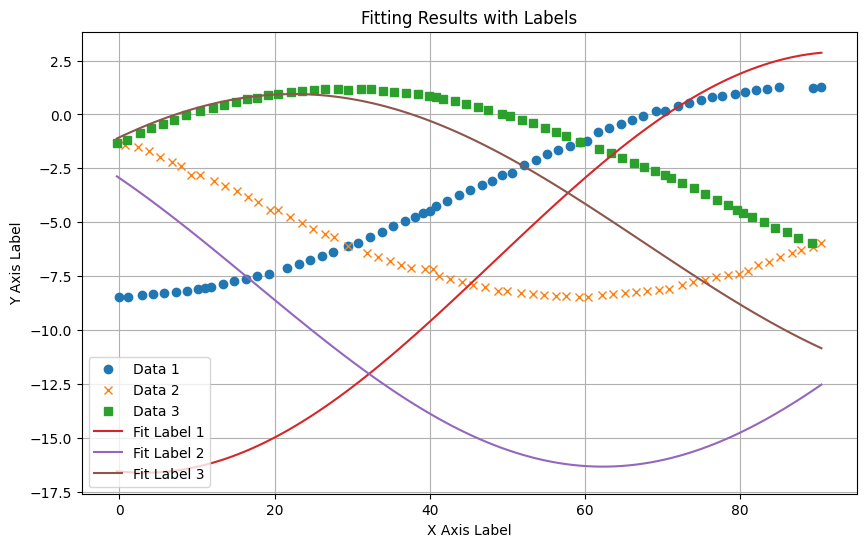

In [9]:
# CSVファイルの読み込み
df1 = pd.read_csv('xy(1).csv')
df2 = pd.read_csv('xy(2).csv')
df3 = pd.read_csv('xy(3).csv')

# データの抽出
x_data_1 = df1['x'].values
x_data_2 = df2['x'].values
x_data_3 = df3['x'].values
y_data_1 = df1['y'].values
y_data_2 = df2['y'].values
y_data_3 = df3['y'].values

# データにラベルを付ける
labels_1 = np.ones_like(x_data_1)
labels_2 = np.ones_like(x_data_2) * 2
labels_3 = np.ones_like(x_data_3) * 3

# データの標準化
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_data_1_standardized = scaler_x.fit_transform(x_data_1.reshape(-1, 1)).flatten()
x_data_2_standardized = scaler_x.transform(x_data_2.reshape(-1, 1)).flatten()
x_data_3_standardized = scaler_x.transform(x_data_3.reshape(-1, 1)).flatten()

y_data_1_standardized = scaler_y.fit_transform(y_data_1.reshape(-1, 1)).flatten()
y_data_2_standardized = scaler_y.transform(y_data_2.reshape(-1, 1)).flatten()
y_data_3_standardized = scaler_y.transform(y_data_3.reshape(-1, 1)).flatten()

# 全データを結合
x_data_combined = np.concatenate([x_data_1, x_data_2, x_data_3])
y_data_combined = np.concatenate([y_data_1, y_data_2, y_data_3])
labels_combined = np.concatenate([labels_1, labels_2, labels_3])

# モデル関数の定義
def model(x, Kxx, Kyy, Kxy, label):
    C = np.cos(np.radians(x))
    S = np.sin(np.radians(x))
    
    if label == 1:
        k1 = C*(C*Kxx + S*Kxy) + S*(C*Kxy + S*Kyy)
        return k1
    elif label == 2:
        k2 = C*(-0.5*Kxx*(-0.5*C - 0.866025403784439*S) - 0.5*Kxy*(-0.866025403784439*C - 0.5*S) - 0.866025403784439*Kxy*(-0.5*C - 0.866025403784439*S) - 0.866025403784439*Kyy*(-0.866025403784439*C - 0.5*S)) + S*(-0.866025403784439*Kxx*(-0.5*C - 0.866025403784439*S) - 0.866025403784439*Kxy*(-0.866025403784439*C - 0.5*S) - 0.5*Kxy*(-0.5*C - 0.866025403784439*S) - 0.5*Kyy*(-0.866025403784439*C - 0.5*S))
        return k2
    elif label == 3:
        k3 = C*(-0.5*Kxx*(-0.5*C + 0.866025403784439*S) + 0.866025403784439*Kxy*(-0.5*C + 0.866025403784439*S) - 0.5*Kxy*(0.866025403784439*C - 0.5*S) + 0.866025403784439*Kyy*(0.866025403784439*C - 0.5*S)) + S*(0.866025403784439*Kxx*(-0.5*C + 0.866025403784439*S) - 0.5*Kxy*(-0.5*C + 0.866025403784439*S) + 0.866025403784439*Kxy*(0.866025403784439*C - 0.5*S) - 0.5*Kyy*(0.866025403784439*C - 0.5*S))
        return k3

# 目的関数の定義
def objective(x, Kxx, Kyy, Kxy):
    y_model = np.zeros_like(y_data_combined)
    
    for label in np.unique(labels_combined):
        # 各ラベルごとにモデルを適用
        x_label = x_data_combined[labels_combined == label]
        y_label = y_data_combined[labels_combined == label]
        
        # モデル関数を適用して予測値を取得
        y_model[labels_combined == label] = model(x_label, Kxx, Kyy, Kxy, label)
    
    return y_model - y_data_combined

# フィッティング
params, params_covariance = curve_fit(objective, x_data_combined, y_data_combined, p0=[1, 1, 1])

print("Fitted parameters: Kxx =", params[0], "Kyy =", params[1], "Kxy =", params[2])

# フィッティング結果のプロット
plt.figure(figsize=(10, 6))

# 各データセットのプロット
plt.plot(x_data_1, y_data_1, 'o', label='Data 1')
plt.plot(x_data_2, y_data_2, 'x', label='Data 2')
plt.plot(x_data_3, y_data_3, 's', label='Data 3')

# フィッティング結果のプロット
x_all = np.linspace(min(x_data_combined), max(x_data_combined), 100)
for label in [1, 2, 3]:
    y_fit = model(x_all, *params, label)
    plt.plot(x_all, y_fit, label=f'Fit Label {label}')

plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Fitting Results with Labels')
plt.legend()
plt.grid(True)

plt.show()

Fitted parameters: Kxx = 0.00013897880832169918 Kyy = 0.014381267453491997 Kxy = -0.8818512320528089


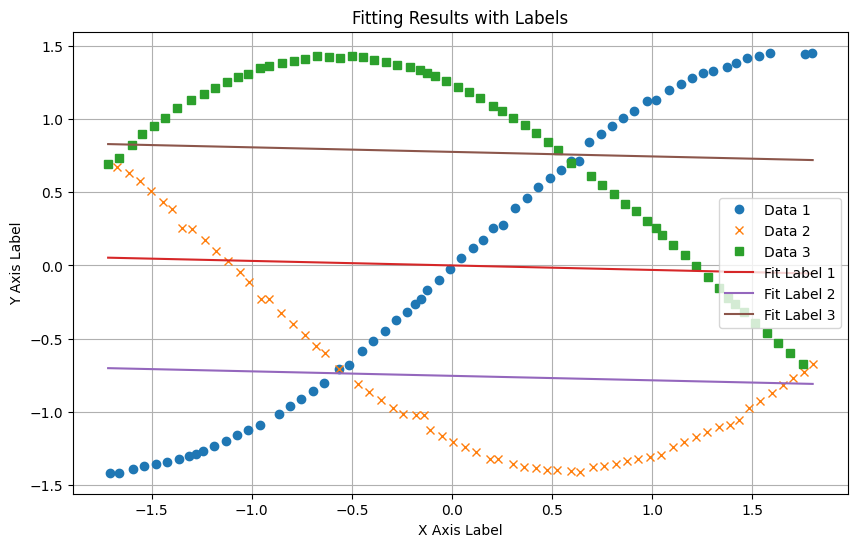

In [10]:
# CSVファイルの読み込み
df1 = pd.read_csv('xy(1).csv')
df2 = pd.read_csv('xy(2).csv')
df3 = pd.read_csv('xy(3).csv')

# データの抽出
x_data_1 = df1['x'].values
x_data_2 = df2['x'].values
x_data_3 = df3['x'].values
y_data_1 = df1['y'].values
y_data_2 = df2['y'].values
y_data_3 = df3['y'].values

# データにラベルを付ける
labels_1 = np.ones_like(x_data_1)
labels_2 = np.ones_like(x_data_2) * 2
labels_3 = np.ones_like(x_data_3) * 3

# データの標準化
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_data_1_standardized = scaler_x.fit_transform(x_data_1.reshape(-1, 1)).flatten()
x_data_2_standardized = scaler_x.transform(x_data_2.reshape(-1, 1)).flatten()
x_data_3_standardized = scaler_x.transform(x_data_3.reshape(-1, 1)).flatten()

y_data_1_standardized = scaler_y.fit_transform(y_data_1.reshape(-1, 1)).flatten()
y_data_2_standardized = scaler_y.transform(y_data_2.reshape(-1, 1)).flatten()
y_data_3_standardized = scaler_y.transform(y_data_3.reshape(-1, 1)).flatten()

# 全データを結合
x_data_combined = np.concatenate([x_data_1_standardized, x_data_2_standardized, x_data_3_standardized])
y_data_combined = np.concatenate([y_data_1_standardized, y_data_2_standardized, y_data_3_standardized])
labels_combined = np.concatenate([labels_1, labels_2, labels_3])

# データとラベルを結合
data_with_labels = np.vstack([x_data_combined, labels_combined]).T

# モデル関数の定義
def model(x, Kxx, Kyy, Kxy, label):
    C = np.cos(np.radians(x))
    S = np.sin(np.radians(x))
    
    if label == 1:
        k1 = C*(C*Kxx + S*Kxy) + S*(C*Kxy + S*Kyy)
        return k1
    elif label == 2:
        k2 = C*(-0.5*Kxx*(-0.5*C - 0.866025403784439*S) - 0.5*Kxy*(-0.866025403784439*C - 0.5*S) - 0.866025403784439*Kxy*(-0.5*C - 0.866025403784439*S) - 0.866025403784439*Kyy*(-0.866025403784439*C - 0.5*S)) + S*(-0.866025403784439*Kxx*(-0.5*C - 0.866025403784439*S) - 0.866025403784439*Kxy*(-0.866025403784439*C - 0.5*S) - 0.5*Kxy*(-0.5*C - 0.866025403784439*S) - 0.5*Kyy*(-0.866025403784439*C - 0.5*S))
        return k2
    elif label == 3:
        k3 = C*(-0.5*Kxx*(-0.5*C + 0.866025403784439*S) + 0.866025403784439*Kxy*(-0.5*C + 0.866025403784439*S) - 0.5*Kxy*(0.866025403784439*C - 0.5*S) + 0.866025403784439*Kyy*(0.866025403784439*C - 0.5*S)) + S*(0.866025403784439*Kxx*(-0.5*C + 0.866025403784439*S) - 0.5*Kxy*(-0.5*C + 0.866025403784439*S) + 0.866025403784439*Kxy*(0.866025403784439*C - 0.5*S) - 0.5*Kyy*(0.866025403784439*C - 0.5*S))
        return k3

# 目的関数の定義
def objective(x_labels, Kxx, Kyy, Kxy):
    y_model = np.zeros(len(x_labels))
    for i, (x, label) in enumerate(x_labels):
        y_model[i] = model(x, Kxx, Kyy, Kxy, label)
    return y_model

# フィッティング
initial_guess = [1, 1, 1]  # 適切な初期値を設定
params, params_covariance = curve_fit(objective, data_with_labels, y_data_combined, p0=initial_guess)

print("Fitted parameters: Kxx =", params[0], "Kyy =", params[1], "Kxy =", params[2])

# フィッティング結果のプロット
plt.figure(figsize=(10, 6))

# 各データセットのプロット
plt.plot(x_data_1_standardized, y_data_1_standardized, 'o', label='Data 1')
plt.plot(x_data_2_standardized, y_data_2_standardized, 'x', label='Data 2')
plt.plot(x_data_3_standardized, y_data_3_standardized, 's', label='Data 3')

# フィッティング結果のプロット
x_all = np.linspace(min(x_data_combined), max(x_data_combined), 100)
for label in [1, 2, 3]:
    y_fit = model(x_all, *params, label)
    plt.plot(x_all, y_fit, label=f'Fit Label {label}')

plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Fitting Results with Labels')
plt.legend()
plt.grid(True)

plt.show()